In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go

from matplotlib import pyplot as plt

In [34]:
delta = tf.Variable(0.0)
delta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [3]:
initializer = tf.initializers.HeNormal()
weights = initializer(shape=(1, 1))
weights

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[2.8709161]], dtype=float32)>

In [4]:
x = tf.random.normal(shape=(1, 50))
x

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.8301153 , -1.0995299 , -0.38813734,  0.65005404, -1.4321412 ,
        -2.11857   , -1.0626101 , -0.15882328, -0.60515213,  0.6060293 ,
         0.86244446, -1.087394  , -0.1794434 , -0.434873  , -0.9123813 ,
        -0.38807186,  0.5138392 ,  0.3944953 ,  2.486528  ,  0.12167536,
         2.306623  ,  1.0088401 , -1.1322087 ,  0.28954378,  1.5432187 ,
         0.30251217, -1.2269776 ,  1.3783375 ,  1.5177941 , -0.7497509 ,
         0.3811285 ,  0.01437481,  0.17333591, -1.648863  , -0.01668357,
         0.19218042, -1.3221813 ,  0.5484422 , -0.30914336, -1.2380909 ,
        -0.31310314, -3.196862  ,  0.38533473, -0.42884678,  0.95270485,
        -1.1946968 , -0.879454  ,  0.3011495 , -1.0633802 ,  0.13732207]],
      dtype=float32)>

In [5]:
x2d = tf.random.uniform(shape=(1, 50))
x2d

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.86698484, 0.28536224, 0.3522035 , 0.5971657 , 0.22411168,
        0.11706448, 0.7261416 , 0.95003676, 0.91621625, 0.8749844 ,
        0.34069753, 0.6360314 , 0.02773309, 0.5682826 , 0.3391881 ,
        0.7225205 , 0.3089217 , 0.2137363 , 0.8350029 , 0.70636225,
        0.05541885, 0.11118948, 0.8446952 , 0.29590702, 0.25853026,
        0.8032285 , 0.5332434 , 0.05407321, 0.15077567, 0.44562495,
        0.34990644, 0.86091244, 0.43440056, 0.95207906, 0.8317989 ,
        0.39052904, 0.9156257 , 0.23345566, 0.25296724, 0.04367697,
        0.16856563, 0.69088745, 0.9559715 , 0.16877139, 0.67438793,
        0.07017672, 0.17493498, 0.5414032 , 0.5245507 , 0.28845203]],
      dtype=float32)>

In [35]:
with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

In [36]:
derivative_x

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[7.7329397e-02, 3.9162669e-02, 1.8602553e-01, 1.1602655e-01,
        1.5858399e-02, 2.2726739e-03, 4.3146763e-02, 2.3744315e-01,
        1.2725556e-01, 1.2703110e-01, 7.1542338e-02, 4.0434033e-02,
        2.3411974e-01, 1.7325033e-01, 6.3291438e-02, 1.8604323e-01,
        1.5150140e-01, 1.8430437e-01, 7.9252990e-04, 2.4252595e-01,
        1.3270602e-03, 4.9597830e-02, 3.5917766e-02, 2.1134041e-01,
        1.1630488e-02, 2.0820807e-01, 2.7854996e-02, 1.8408086e-02,
        1.2488887e-02, 9.3263537e-02, 1.8791455e-01, 2.4989359e-01,
        2.3513968e-01, 8.6408220e-03, 2.4985665e-01, 2.3189959e-01,
        2.1487130e-02, 1.4213464e-01, 2.0657815e-01, 2.7028957e-02,
        2.0559627e-01, 1.0327360e-04, 1.8678200e-01, 1.7490998e-01,
        5.7218909e-02, 3.0390382e-02, 6.8639114e-02, 2.0854068e-01,
        4.3060068e-02, 2.4053213e-01]], dtype=float32)>

In [37]:
with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x2d) + delta)

derivative_x2 = tape.jacobian(out, delta)

In [38]:
derivative_x2

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.07075789, 0.21233398, 0.19559701, 0.12930785, 0.22581261,
        0.24307135, 0.09836267, 0.05760499, 0.06269159, 0.06939267,
        0.19859175, 0.11947412, 0.24960421, 0.13685258, 0.19898166,
        0.09916126, 0.20663294, 0.2278687 , 0.07643164, 0.10277732,
        0.24842454, 0.24373797, 0.0746756 , 0.20981285, 0.21850055,
        0.08241386, 0.1462274 , 0.24849983, 0.23864551, 0.17028444,
        0.19619799, 0.07180858, 0.17338052, 0.05730929, 0.07701921,
        0.18537888, 0.06278367, 0.22389996, 0.21973051, 0.24901986,
        0.2359157 , 0.10631982, 0.05674944, 0.2358826 , 0.11018061,
        0.24748014, 0.23487549, 0.14402553, 0.14858392, 0.21160062]],
      dtype=float32)>

In [10]:
layer = tf.keras.layers.Dense(16, kernel_initializer=initializer, activation=tf.nn.sigmoid)

with tf.GradientTape() as t:
    y = layer(x)

y

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[0.09875406, 0.21847177, 0.31926814, 0.9592777 , 0.10202565,
        0.266552  , 0.10448585, 0.11678002, 0.44382945, 0.77355975,
        0.22219057, 0.2966671 , 0.21621786, 0.51411027, 0.43875244,
        0.95340455]], dtype=float32)>

## logistic activation

In [11]:
activated = tf.nn.sigmoid(x)
activated

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.6963793 , 0.24982801, 0.40416577, 0.65702266, 0.1927653 ,
        0.10730497, 0.25681096, 0.46037748, 0.35316586, 0.64703447,
        0.70317113, 0.25210932, 0.4552591 , 0.3929633 , 0.28651282,
        0.4041815 , 0.625706  , 0.5973644 , 0.92319196, 0.5303814 ,
        0.9094241 , 0.7327931 , 0.24375373, 0.57188445, 0.8239321 ,
        0.5750565 , 0.22671086, 0.7987238 , 0.82021344, 0.32087559,
        0.59414524, 0.5035936 , 0.5432258 , 0.16126268, 0.49582925,
        0.5478978 , 0.2104556 , 0.63377404, 0.42332387, 0.22476849,
        0.4223575 , 0.03928398, 0.5951591 , 0.39440176, 0.72165877,
        0.23241998, 0.29329094, 0.5747235 , 0.256664  , 0.53427666]],
      dtype=float32)>

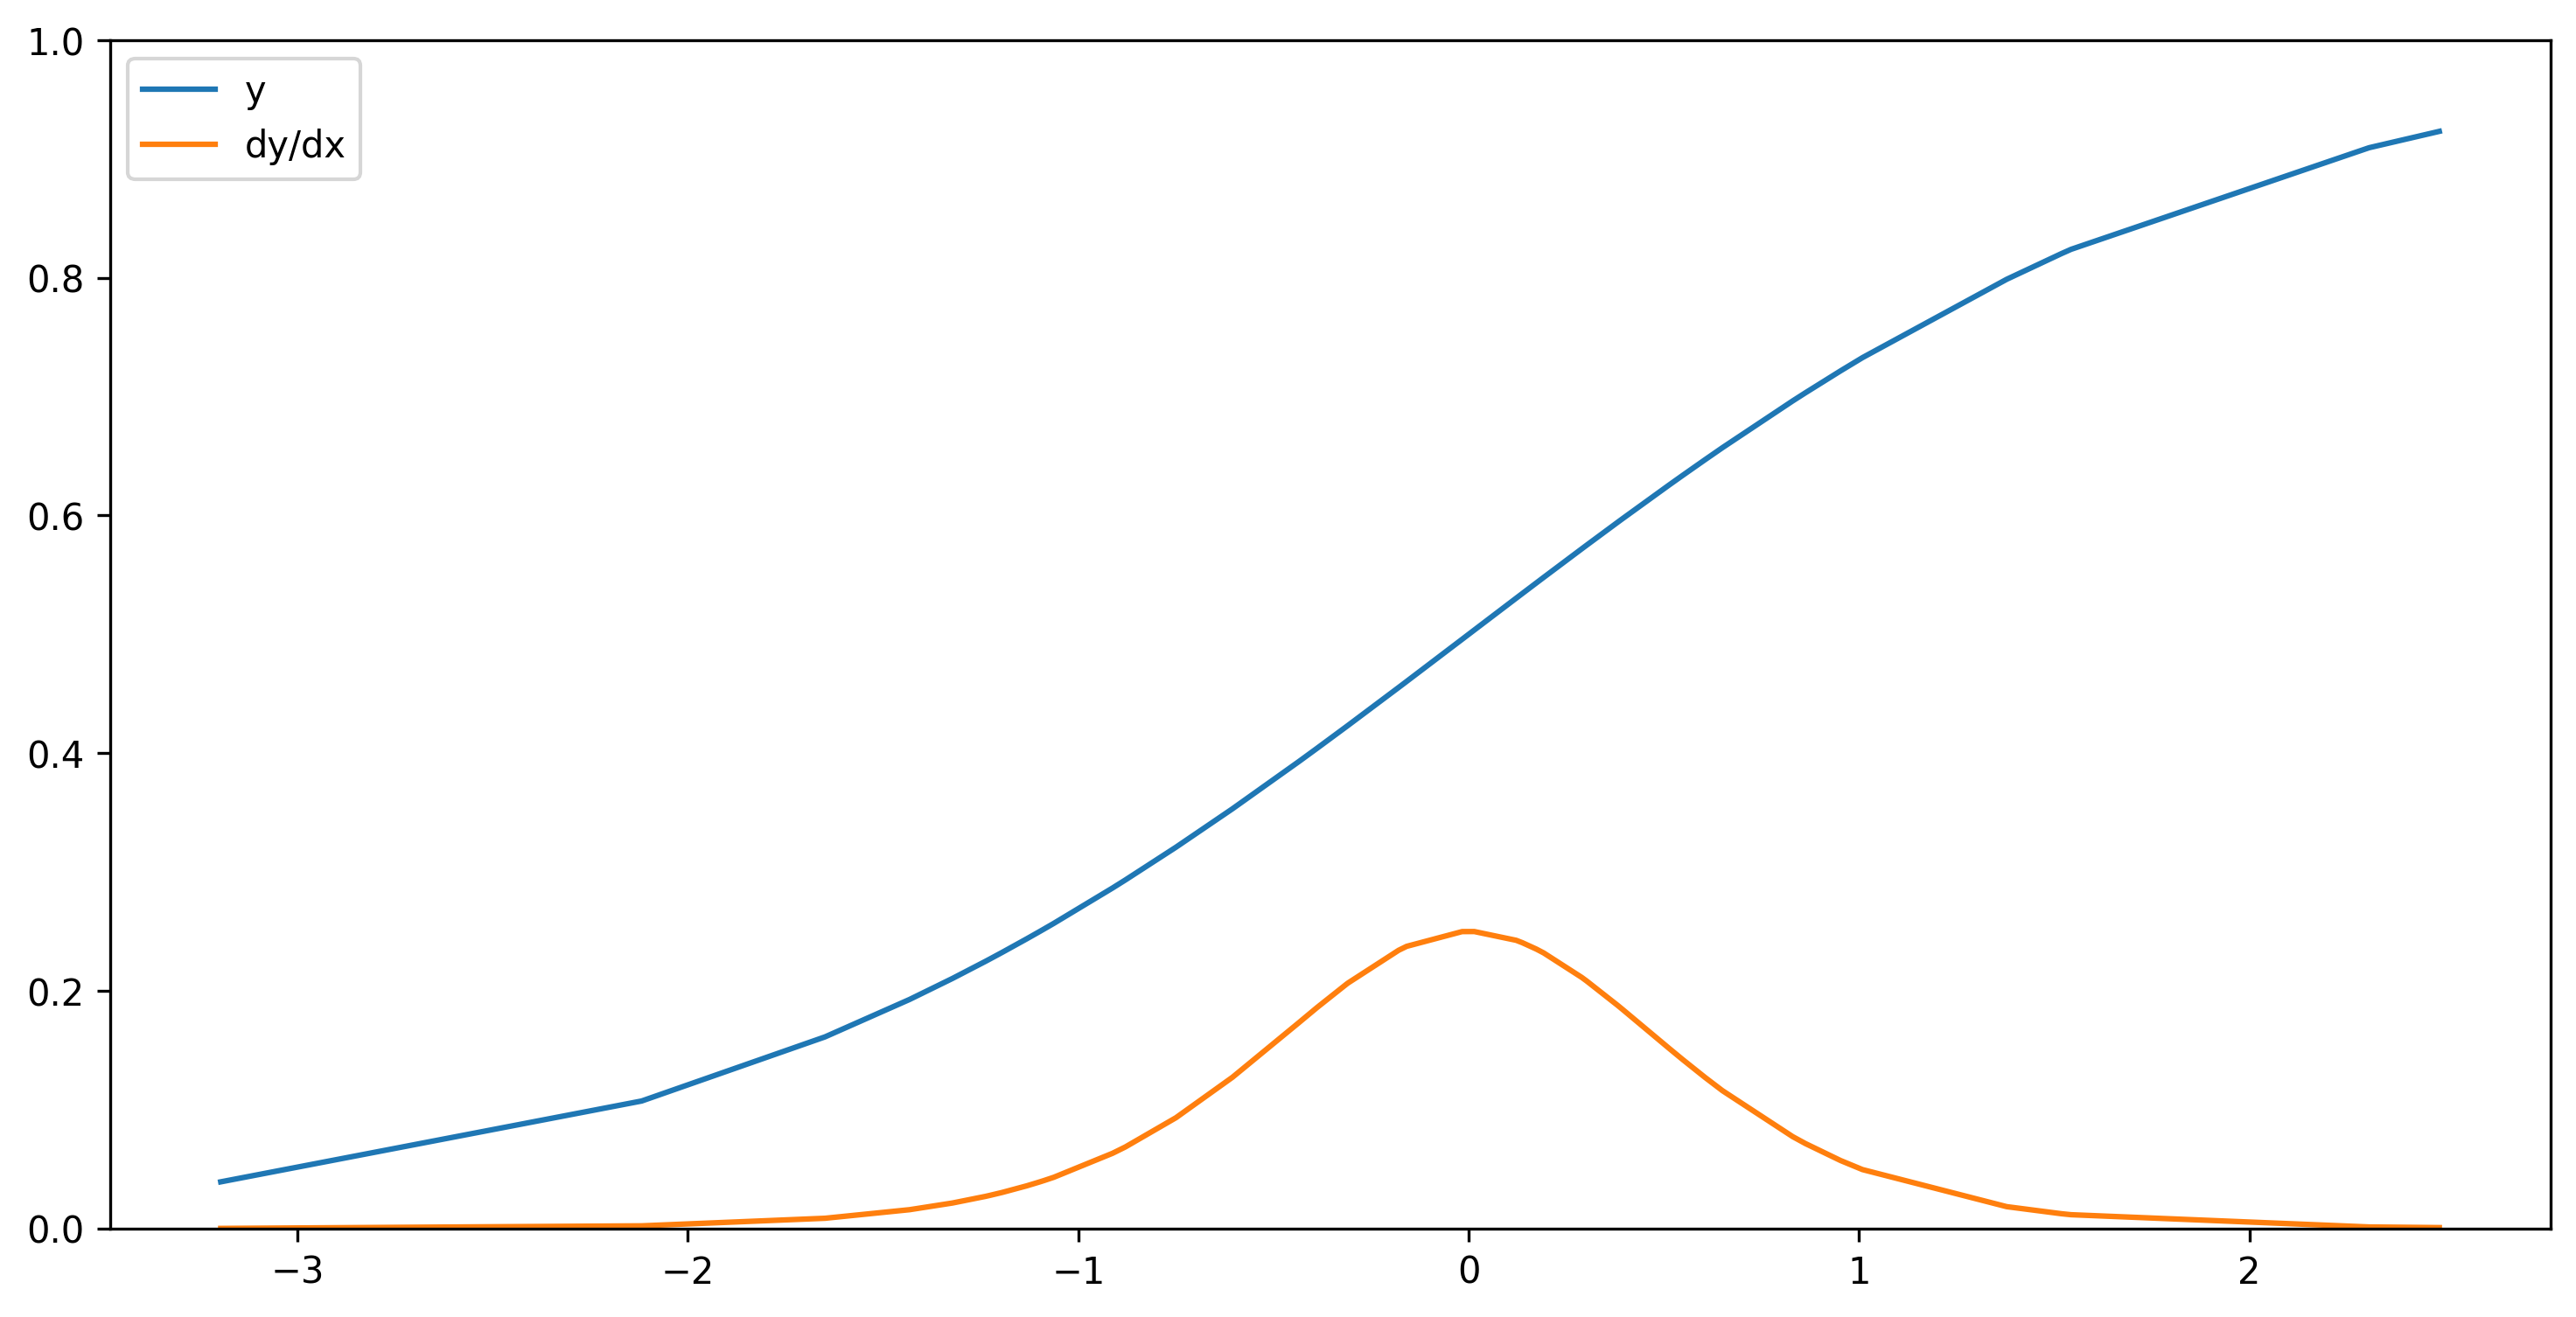

In [12]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
plt.ylim(0, 1)
plt.savefig('../../images/activation/sig-singel-act.jpg')
plt.show()

In [13]:
activated = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x))
activated

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[9.1553652e-01, 4.0829737e-02, 2.4706827e-01, 8.6602384e-01,
        1.6118195e-02, 2.2778625e-03, 4.5188788e-02, 3.8794267e-01,
        1.4965098e-01, 8.5066921e-01, 9.2244250e-01, 4.2216245e-02,
        3.7398306e-01, 2.2296271e-01, 6.7902140e-02, 2.4710326e-01,
        8.1384486e-01, 7.5631160e-01, 9.9920684e-01, 5.8645260e-01,
        9.9867117e-01, 9.4766301e-01, 3.7309784e-02, 6.9662040e-01,
        9.8823100e-01, 7.0443076e-01, 2.8677389e-02, 9.8123997e-01,
        9.8735112e-01, 1.0410044e-01, 7.4916953e-01, 5.1031578e-01,
        6.2190288e-01, 8.7168049e-03, 4.8802802e-01, 6.3453776e-01,
        2.1969803e-02, 8.2842863e-01, 2.9162088e-01, 2.7801905e-02,
        2.8927806e-01, 1.0328427e-04, 7.5143188e-01, 2.2597443e-01,
        9.3906844e-01, 3.1374756e-02, 7.4135132e-02, 7.0361561e-01,
        4.5093492e-02, 5.9730297e-01]], dtype=float32)>

In [14]:
activated_x2d = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x2d))
activated_x2d

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.92336994, 0.6940774 , 0.7332445 , 0.84740776, 0.65552294,
        0.58323854, 0.8894064 , 0.93862855, 0.9327914 , 0.9249792 ,
        0.72673386, 0.86128366, 0.51989436, 0.8363739 , 0.7258724 ,
        0.88837963, 0.7082476 , 0.6487659 , 0.91661537, 0.8836961 ,
        0.53969204, 0.57913303, 0.91871756, 0.70046735, 0.6774808 ,
        0.90937287, 0.82213753, 0.5387322 , 0.6065574 , 0.78233945,
        0.7319526 , 0.92212725, 0.77680224, 0.9389655 , 0.9159096 ,
        0.75420684, 0.932685  , 0.66155505, 0.6739813 , 0.5313072 ,
        0.61867726, 0.8790517 , 0.93960273, 0.6188167 , 0.8739243 ,
        0.5501982 , 0.6229818 , 0.8255372 , 0.8184589 , 0.6959576 ]],
      dtype=float32)>

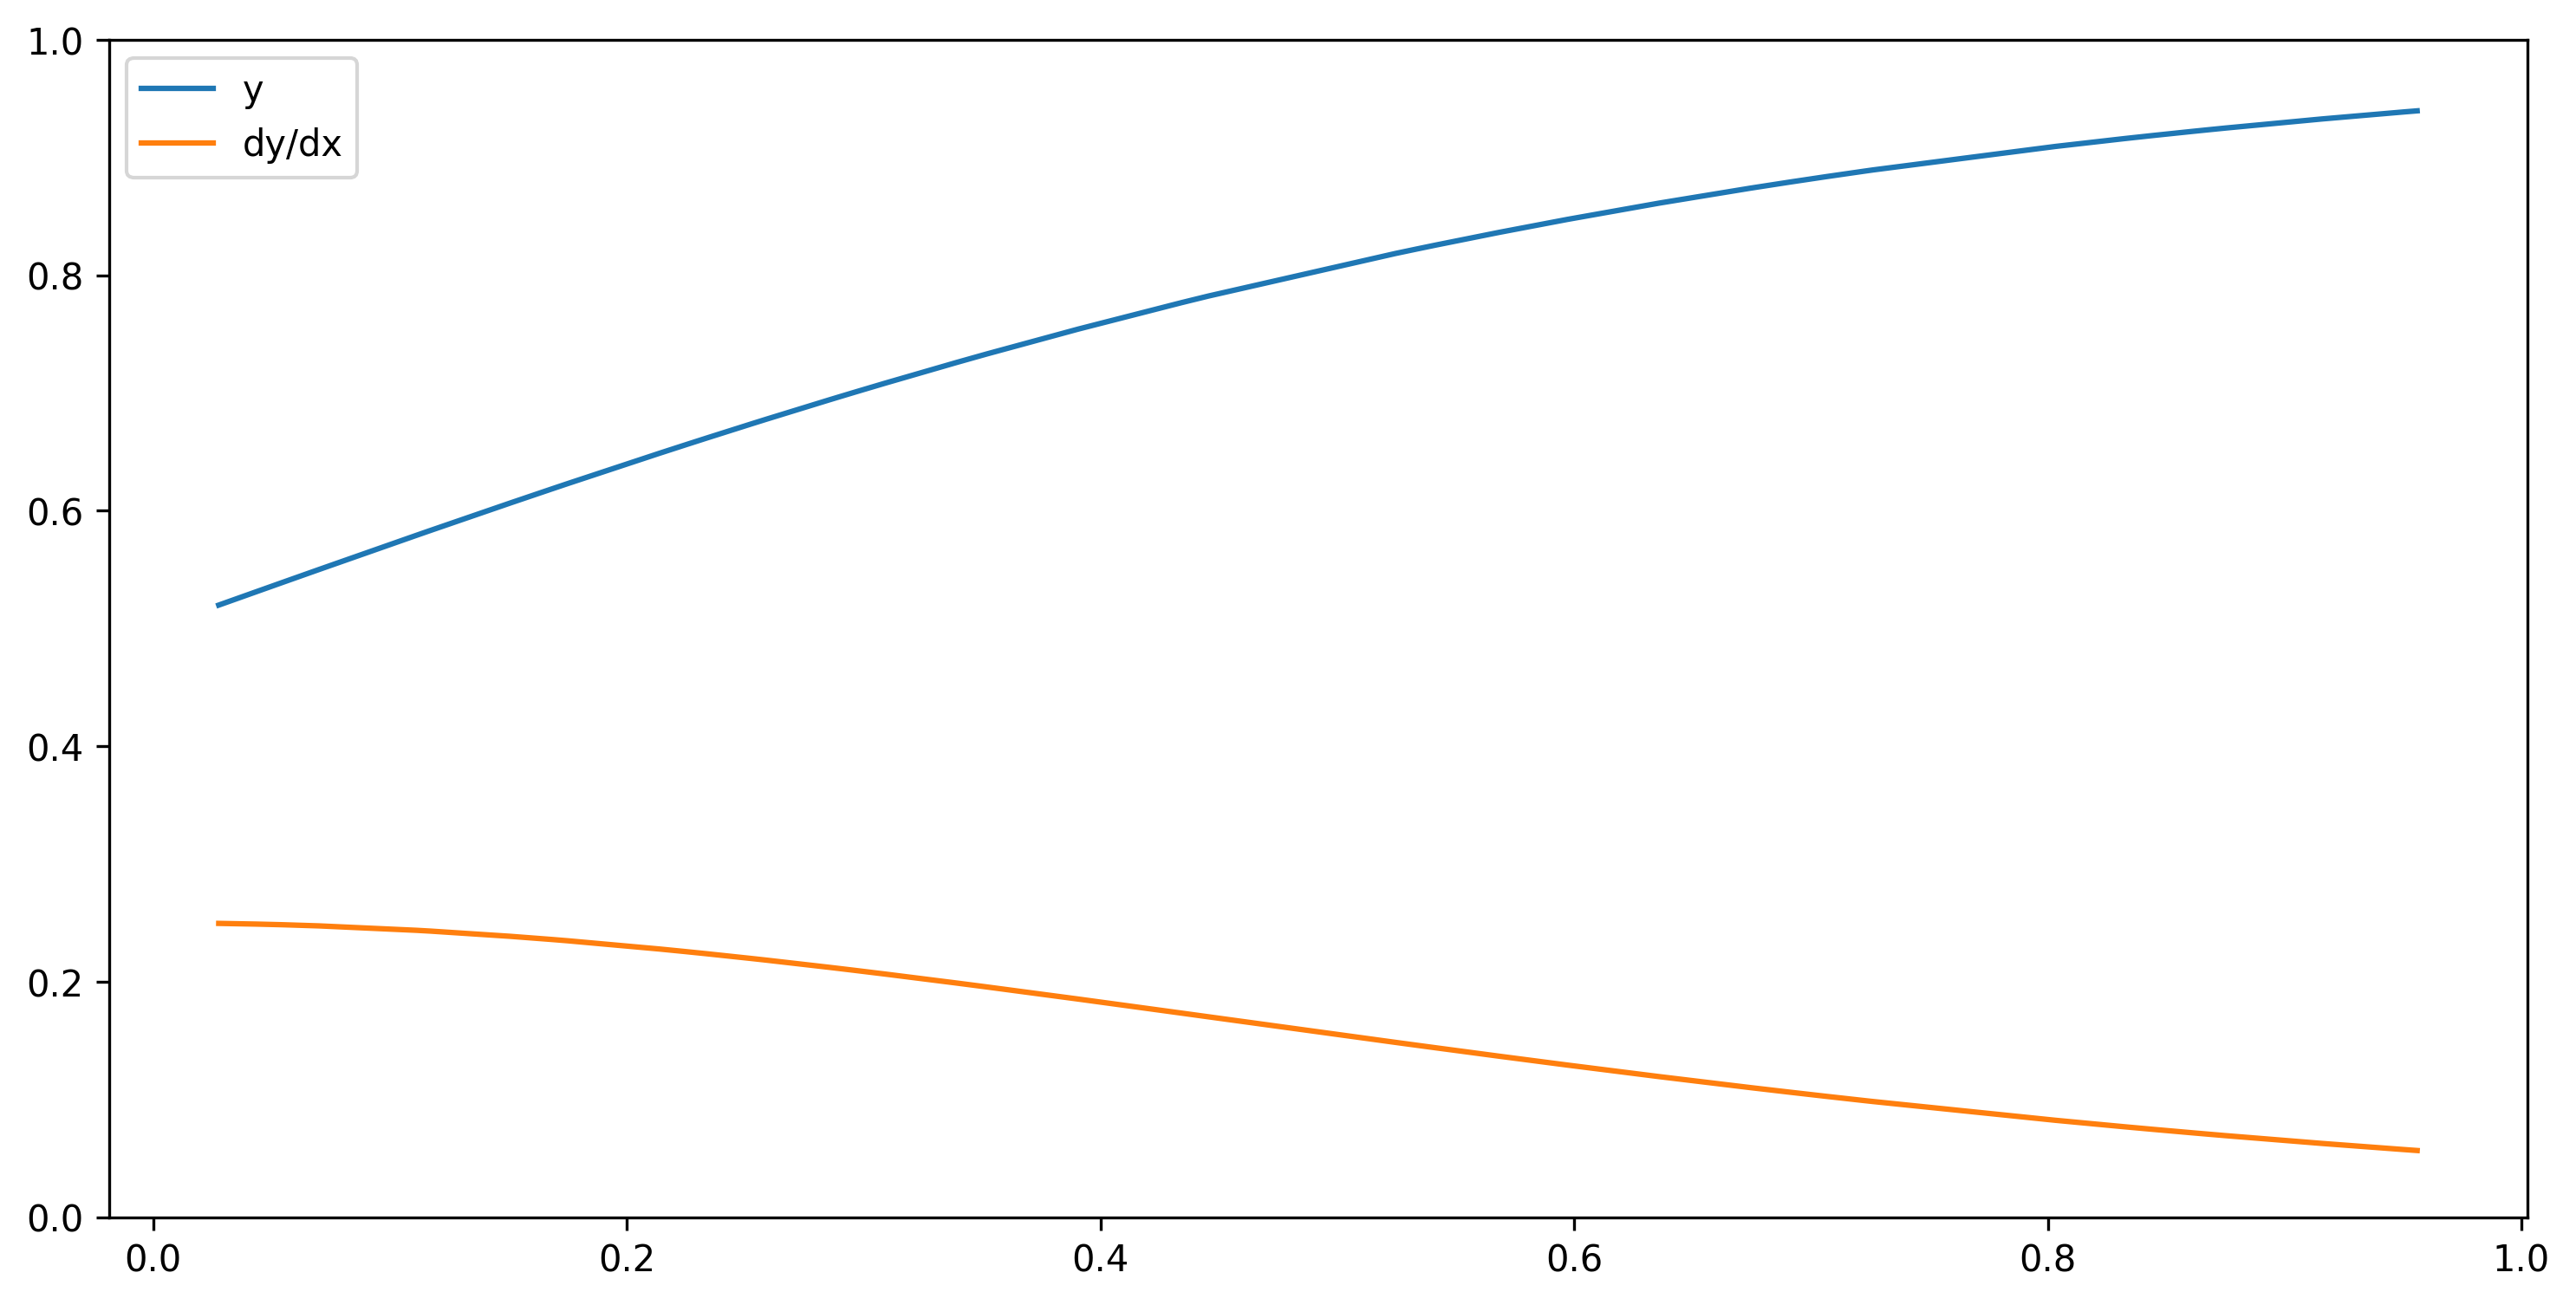

In [15]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x2d.numpy()[0], y=activated_x2d.numpy()[0], label='y')
sns.lineplot(x=x2d.numpy()[0], y=derivative_x2.numpy()[0], label='dy/dx')
plt.ylim(0, 1)
plt.savefig('../../images/activation/sig-singel-act-1.jpg')
plt.show()

## arctan and tanh


In [39]:
activated = tf.nn.tanh(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.tanh(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

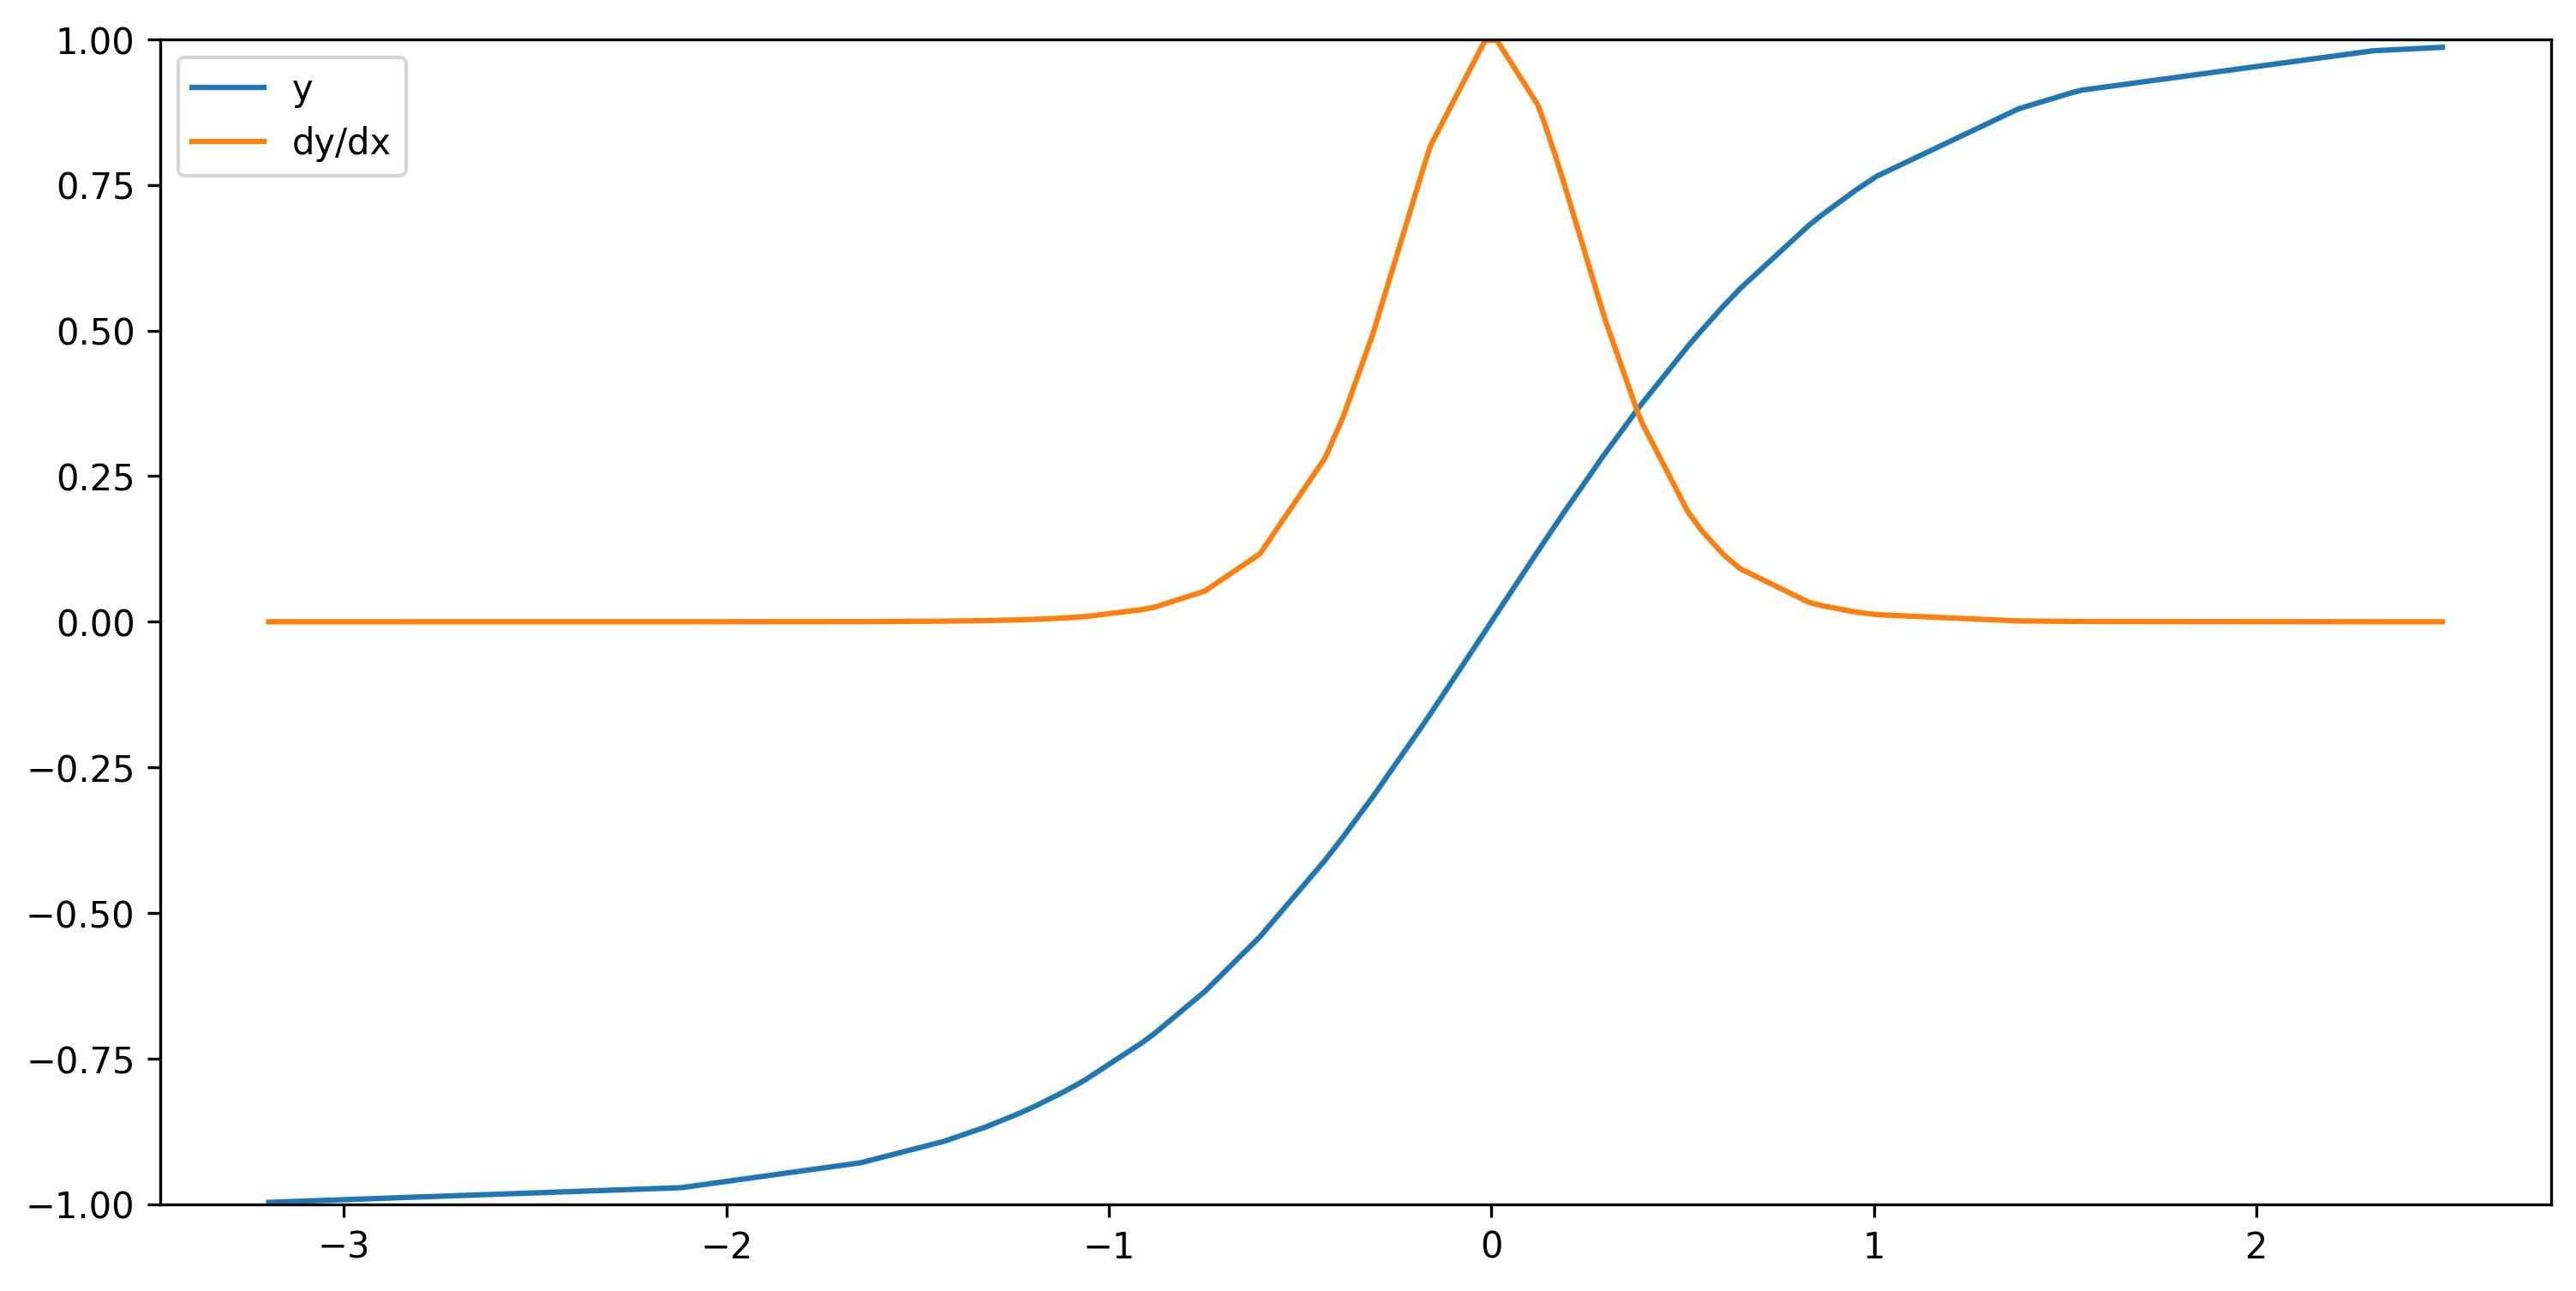

In [44]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
plt.ylim(-1, 1)
plt.savefig('../../images/activation/arctan-singel-act.jpg')
plt.show()